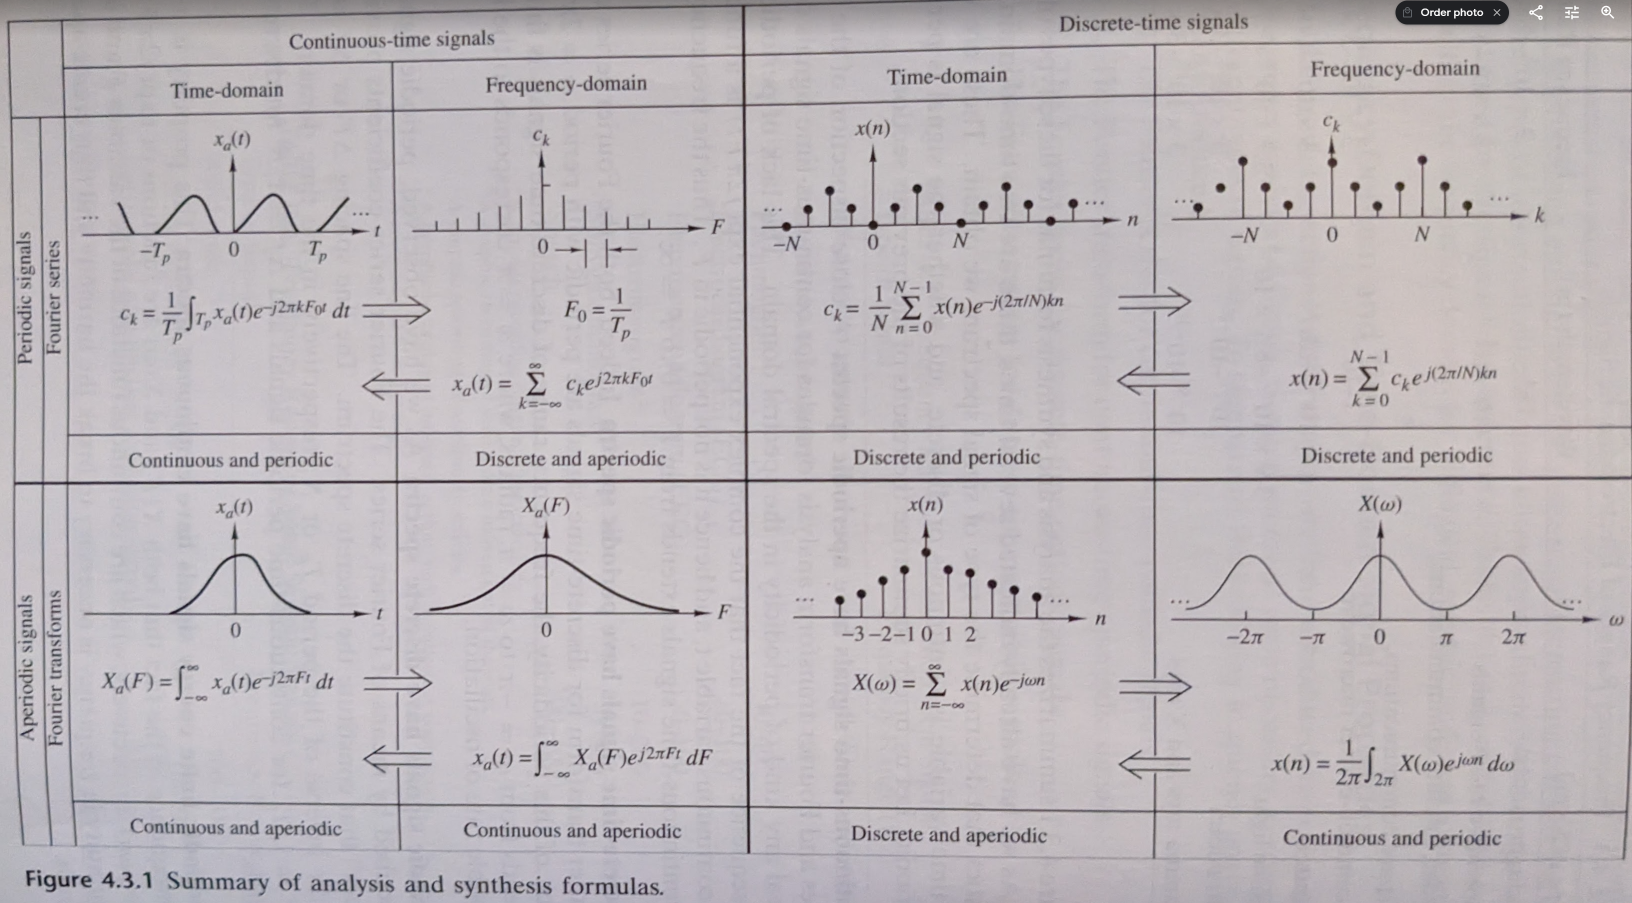

**DTFT**
- What is it? Discrete-Time Fourier Transform
  - time domain: infinite sequence of numbers {...,x[-1],x[0],x[1],x[2],...}
  - frequency domain: continuous function of frequency over [$-\pi$, $\pi$] domain
- Relationship to FT, FS, DFT
  - see figure 4.3.1 from Proakis and Manolakis
- DFT is Discrete Fourier Transform, computed efficiently by FFT (Fast Fourier Transform) algorithms
  - FFT is basically synonymous with DFT
  - samples of the DTFT


FORWARD **DTFT**: how to get DTFT $X(\omega)$ from samples of signal $x(n)$:
$$
  X(\omega) = \sum_{n=-\infty}^\infty x(n) e^{-j \omega n}
$$


FORWARD **DFT**: how to get DFT $X(k)$ from samples of signal $x(n)$ of length $N$:
$$
  X(k) = X_{DTFT}(\omega=2\pi k/N) = \sum_{n=0}^{N-1} x(n) e^{-j 2 \pi k n/N}
$$
(Proakis and Manolakis call $X(k) = c_k$ in Figure 4.3.1. See Section 7.1.2, equation 7.1.18 for more explanation.) 

Only difference between DTFT and DFT is the limit in the summation!

(Requires that signal is _finite length_, that is, $x(n)$ = 0 before $n=0$ and after $n=N-1$)
$$
x(n) = \{...,0,0,x[0],x[1],...,x[N-2],x[N-1],0,0,...\}
$$

**COMPUTERS**

A finite length signal is just a **vector** $[ x[0],x[1], ..., x[N-1] ]$

==> we can use numpy or matlab (or C or C++ or your favorite) to process.

**numpy** numerical python - library for efficiently processing vectors (and higher dimensional arrays) in contiguous* chunks of memory of different data types.

**scipy** scientific python - **scipy.signal** has some good signal processing functions like _upfirdn_ (polyphase filtering) and _remez_ (filter design).

In [1]:
%matplotlib widget

In [2]:
from matplotlib.pyplot import *

In [3]:
import sounddevice as sd


In [101]:
Fs = 20000
x = sd.rec(frames=2*Fs, channels=1, samplerate=Fs, dtype=np.int32, blocking=True)

In [104]:
x[:100]

array([[ -327680],
       [-1376256],
       [ -786432],
       [ -917504],
       [-2162688],
       [-1703936],
       [ -393216],
       [ -393216],
       [ -655360],
       [ -458752],
       [ -393216],
       [ -589824],
       [   65536],
       [  655360],
       [  589824],
       [  851968],
       [ 1245184],
       [ 1179648],
       [ 1310720],
       [ 1376256],
       [  589824],
       [  262144],
       [  655360],
       [       0],
       [ -655360],
       [  458752],
       [  786432],
       [ -524288],
       [ -655360],
       [ -131072],
       [ -458752],
       [ -196608],
       [  262144],
       [ -393216],
       [ -327680],
       [  917504],
       [ 1441792],
       [ 1114112],
       [ 1048576],
       [  589824],
       [  131072],
       [  983040],
       [ 1179648],
       [       0],
       [-1441792],
       [-2686976],
       [-1835008],
       [  720896],
       [ 1114112],
       [ -458752],
       [-1114112],
       [ -720896],
       [  85

In [102]:
x

array([[ -327680],
       [-1376256],
       [ -786432],
       ...,
       [22609920],
       [22675456],
       [23592960]])

In [103]:
x.dtype, len(x)

(dtype('int32'), 40000)

In [5]:
sd.rec?

Text(0, 0.5, 'signal amplitude')

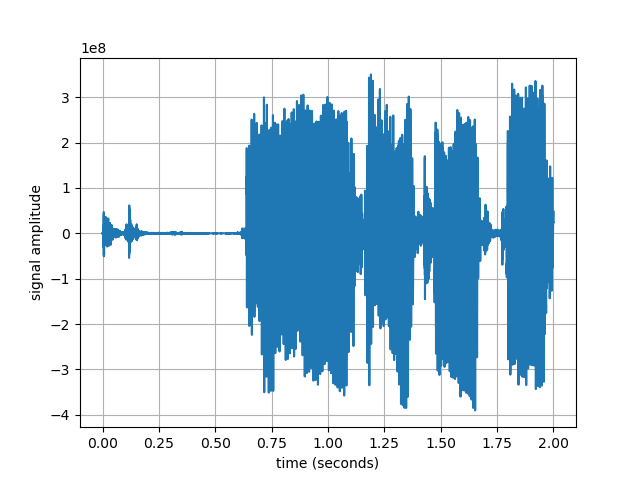

In [105]:
figure()
t = np.arange(len(x))/Fs
plot(t, x)
grid()
xlabel('time (seconds)')
ylabel('signal amplitude')

In [106]:
sd.play(x, samplerate=Fs)

In [108]:
# 500 Hz cosine wave
Fs = 20000
t = np.arange(0, 2*Fs)/Fs
y = np.array(np.cos(2*np.pi*t*500)*1e8, dtype=np.int32)

In [110]:
sd.play(y, samplerate=Fs)

In [111]:
'%08x'%int(1e8)

'05f5e100'

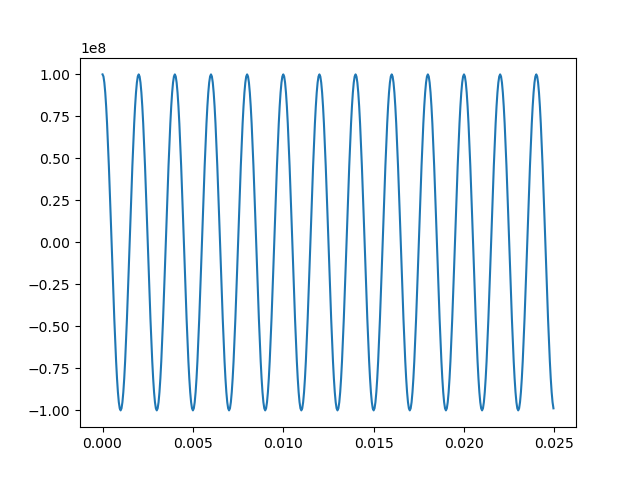

In [112]:
figure()
plot(t[:500], y[:500])

In [26]:
len(y)

40000

Text(0.5, 0, 'time (seconds)')

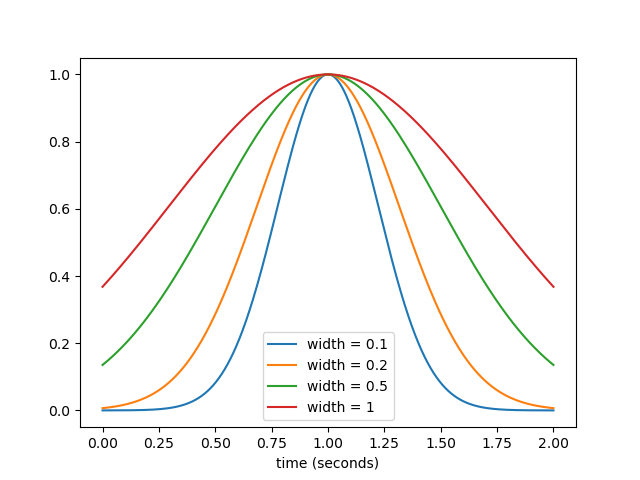

In [113]:
figure()

gaussian_center = 1.0
for gaussian_width in [0.1,0.2,0.5,1]:
    g = np.exp(-(t-gaussian_center)**2/gaussian_width)
    plot(t, g, label=f'width = {gaussian_width}')
legend()
xlabel('time (seconds)')

Text(0.5, 0, 'time (seconds)')

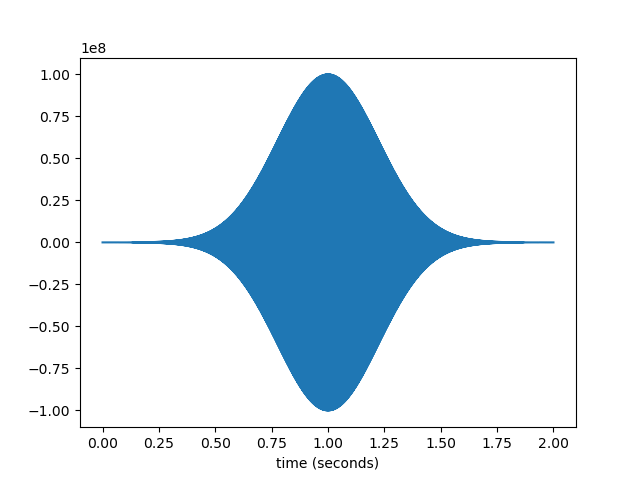

In [114]:
g = np.exp(-(t-gaussian_center)**2/0.1)
y1 = np.array(y*g, dtype=np.int32)  # Must convert to int32!

figure()
plot(t, y1)
xlabel('time (seconds)')

In [117]:
sd.play(y1*10, samplerate=Fs)


## np.fft - Fast Fourier Transform function in numpy

### indices are 0 to N-1


$$
  X(k) = X_{DTFT}(\omega=2\pi k/N) = \sum_{n=0}^{N-1} x(n) e^{-j 2 \pi k n/N}
$$
Here
$$
x(n) = 1e8 \cos(2 \pi n 500/Fs) = 1e8\frac{1}{2}(e^{+j2 \pi n 500/Fs}+e^{-j2 \pi n 500/Fs})
$$

Text(0.5, 1.0, 'FFT of length 40000 cosine, sampled at 20000 Hz')

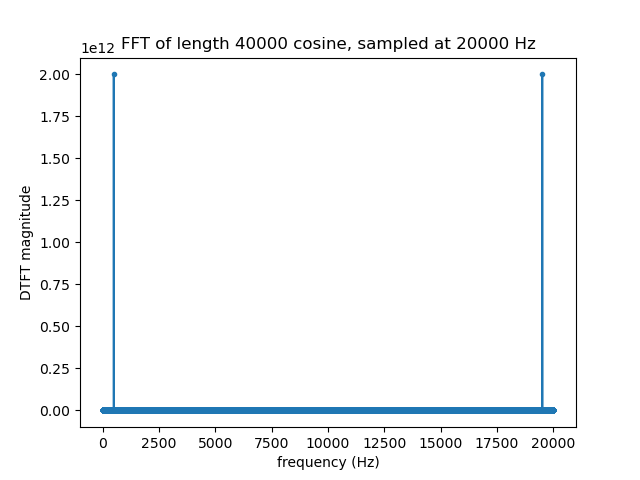

In [74]:
nfft = len(y)
Y = np.fft.fft(y, nfft)
f = (np.arange(nfft)/nfft)*Fs
figure()
plot(f, abs(Y), '.-')
xlabel('frequency (Hz)')
ylabel('DTFT magnitude')
title(f'FFT of length {len(y)} cosine, sampled at {Fs} Hz')
# amplitude??  2e12 = 1e8 (cosine amplitude) x 40000 (nfft) x 1/2

### FFT shift - swap 2 halves of vector

In [118]:
print(np.arange(10))
print(np.fft.fftshift(np.arange(10)))

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9 0 1 2 3 4]


Text(0.5, 1.0, 'FFT of length 40000 cosine sampled at 20000 Hz')

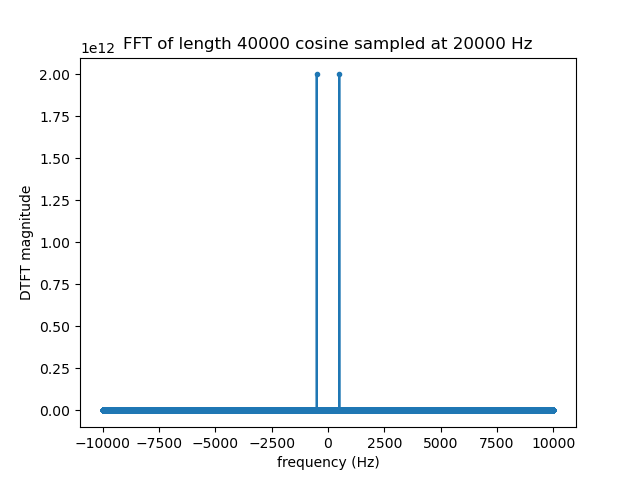

In [119]:
nfft = len(y)
Y = np.fft.fft(y, nfft)
Y = np.fft.fftshift(Y)
f = (np.arange(nfft)/nfft - 0.5)*Fs
figure()
plot(f, abs(Y), '.-')
xlabel('frequency (Hz)')
ylabel('DTFT magnitude')
title(f'FFT of length {len(y)} cosine sampled at {Fs} Hz')


In [120]:
Fs = 20000
t = np.arange(0, 2*Fs)/Fs
y2 = np.array(np.cos(2*np.pi*t*500.1)*1e8, dtype=np.int32)

In [121]:
sd.play(y2, samplerate=Fs)

Text(0, 0.5, 'DTFT magnitude')

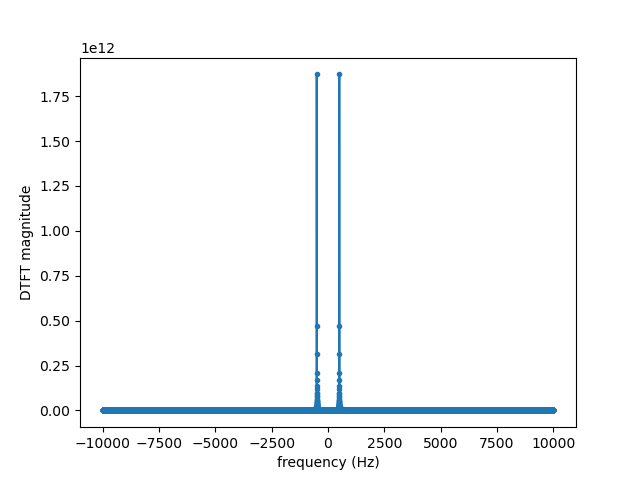

In [122]:
nfft = len(y2)
Y2 = np.fft.fft(y2, nfft)
Y2 = np.fft.fftshift(Y2)
f = (np.arange(nfft)/nfft - 0.5)*Fs
figure()
plot(f, abs(Y2), '.-')
xlabel('frequency (Hz)')
ylabel('DTFT magnitude')

C:\Users\hp\AppData\Local\Temp\ipykernel_6248\2737271766.py:14: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(abs(Y)), label=500)


[495.0, 505.0]

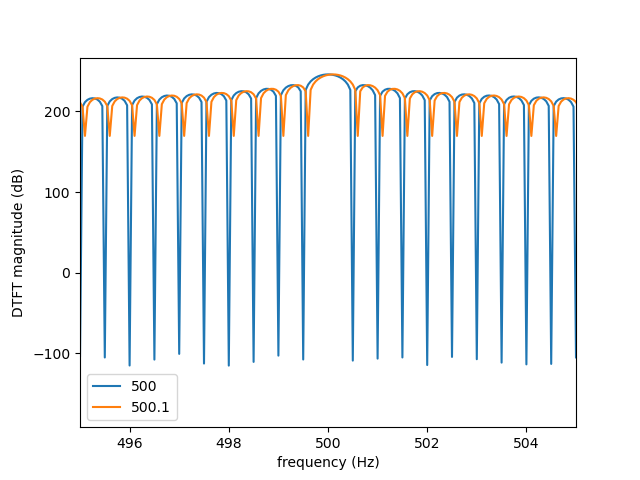

In [129]:
# nfft is 10x signal length

nfft = len(y2)*10
f = (np.arange(nfft)/nfft - 0.5)*Fs

Y = np.fft.fft(y, nfft)
Y = np.fft.fftshift(Y)
Y2 = np.fft.fft(y2, nfft)
Y2 = np.fft.fftshift(Y2)



figure()
plot(f, 20*np.log10(abs(Y)), label=500)
plot(f, 20*np.log10(abs(Y2)), label=500.1)
xlabel('frequency (Hz)')
ylabel('DTFT magnitude (dB)')
legend()
setp(gca(), xlim=(495,505))

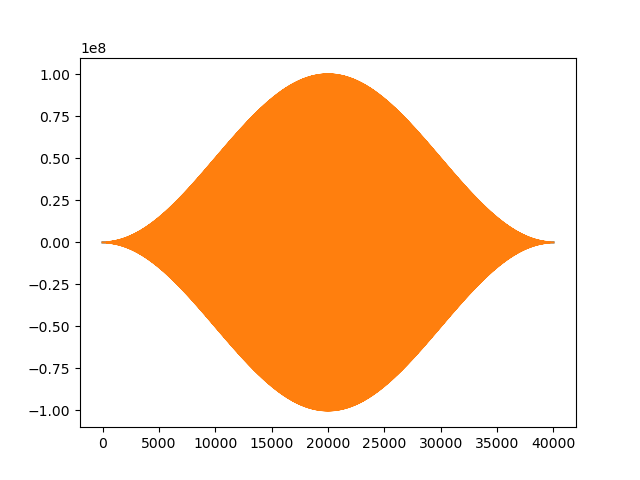

In [126]:
figure()
window = np.hanning(len(y))
plot(window)
plot(y*window)

Text(0.5, 1.0, 'DTFT with a window')

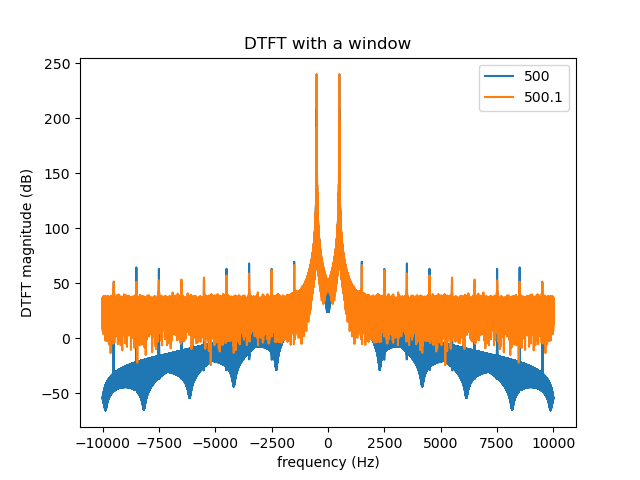

In [127]:
# nfft is 10x signal length

nfft = len(y2)*10
f = (np.arange(nfft)/nfft - 0.5)*Fs

window = np.hanning(len(y))
Y = np.fft.fft(window*y, nfft)
Y = np.fft.fftshift(Y)
Y2 = np.fft.fft(window*y2, nfft)
Y2 = np.fft.fftshift(Y2)

figure()
plot(f, 20*np.log10(abs(Y)), label=500)
plot(f, 20*np.log10(abs(Y2)), label=500.1)
xlabel('frequency (Hz)')
ylabel('DTFT magnitude (dB)')
legend()
title('DTFT with a window')
#setp(gca(), xlim=(490,510))

In [130]:
z = np.array(1e8*np.random.randn(20000*2), np.int32)

In [131]:
z[:100]

array([  56941653,   28177474,   88748026,   16303812,  -55760857,
         62181585,   13949152,   58794296,   -7669317,  -39549150,
          2128990,   62311662,    9865264,  -85306415,   29355817,
         58856686,  -55908470,  -78467952,    7382426,  -28493250,
         80870430,  -29394975,     711578,   27835763, -240057610,
        -66106716,  -55497634,  214448532,   -4947223,  -95853053,
        121283216,   41767748,  -14001079,  -69361472,  -72276149,
        -19874904,   18914394,     654773, -120313967,   81146735,
         74563993,  184911232,  111106950,  -64238675,  -78822057,
         77851844,   21244565,   68791847,   69021715,  -13794478,
        -35408686, -103642342,  -80786809,   -5846494,  -88496425,
         45161107,   45035464,   26330834, -198177013,  -18944787,
         61369298,  100472922,    1867125, -109497988,  -91073691,
        -22498039,   10341058,   -4801643,   51634837,   70839490,
       -117304917,   34874721,   24184260,  -30211725,   77022

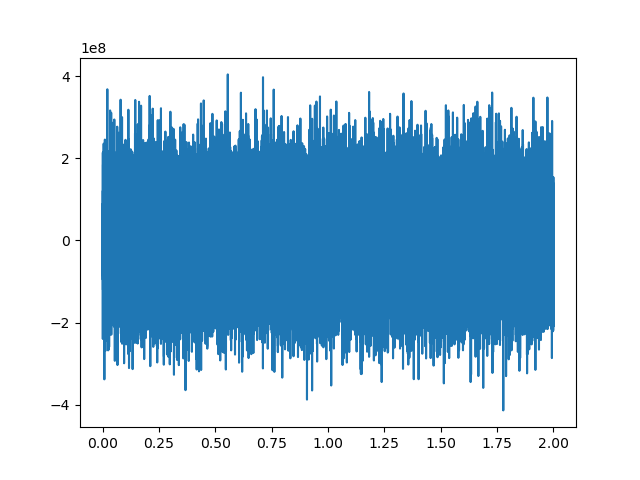

In [132]:
figure()
plot(np.arange(len(z))/Fs, z)

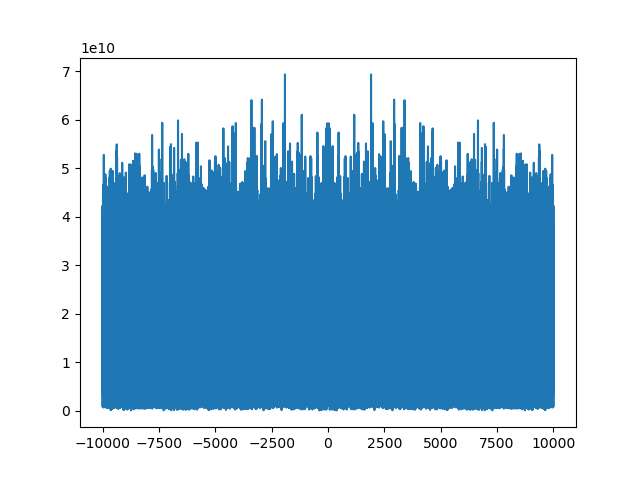

In [133]:
Z = np.fft.fftshift(np.fft.fft(z, nfft))
figure()
plot(f, abs(Z))

In [134]:
sd.play(z, samplerate=Fs)

## Create a cosine that changes frequency every so often

In [135]:
Fs

20000

In [136]:
n_current = 0
n_total = 10*Fs
r1 = np.zeros((n_total,), np.int32)
frequency = 0
frequency_step = 500
frequency_dwell_time = 0.2
time_since_change = 0
while n_current < n_total:
    if time_since_change >= frequency_dwell_time:
        time_since_change = 0
        frequency += frequency_step
    r1[n_current] = 1e8*np.cos(2*np.pi*n_current/Fs*frequency)
    n_current += 1
    time_since_change += 1/Fs

Text(0, 0.5, 'signal amplitude')

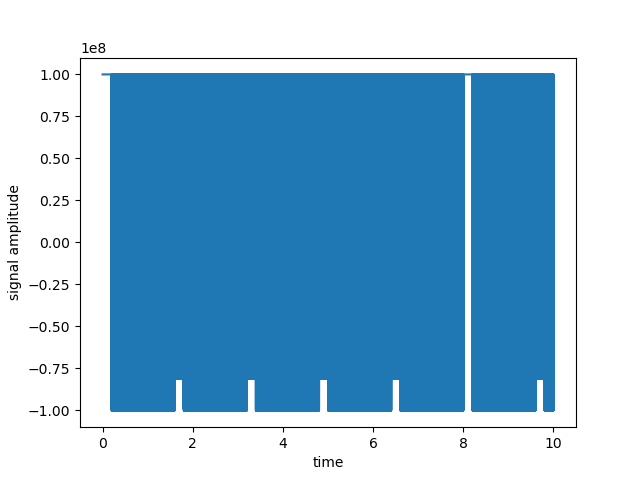

In [137]:
figure()
plot(np.arange(len(r1))/Fs, r1)
xlabel('time')
ylabel('signal amplitude')

In [143]:
sd.play(r1, Fs)

Text(0, 0.5, 'DTFT magnitude')

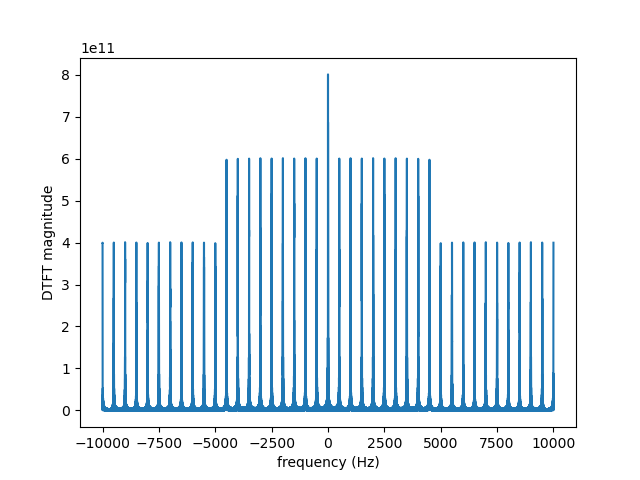

In [139]:
R1 = np.fft.fftshift(np.fft.fft(r1))
figure()
plot((np.arange(len(R1))/len(R1)-0.5)*Fs, abs(R1))
xlabel('frequency (Hz)')
ylabel('DTFT magnitude')

In [94]:
r1.shape

(200000,)

In [95]:
def short_term_fourier_transform(x, nfft, nshift):
    X_list = []
    n = 0
    while n+nfft < len(x):
        X = np.hanning(nfft)*np.fft.fft(x[n:n+nfft], nfft)
        X = np.fft.fftshift(X)
        X_list.append(X)
        n += nshift
    X_list = np.array(X_list)
    return X_list

In [140]:
nfft = 2000
nshift = 200
R1 = short_term_fourier_transform(r1, nfft, nshift)


In [141]:
R1.shape

(990, 2000)

Text(0, 0.5, 'frequency (Hz)')

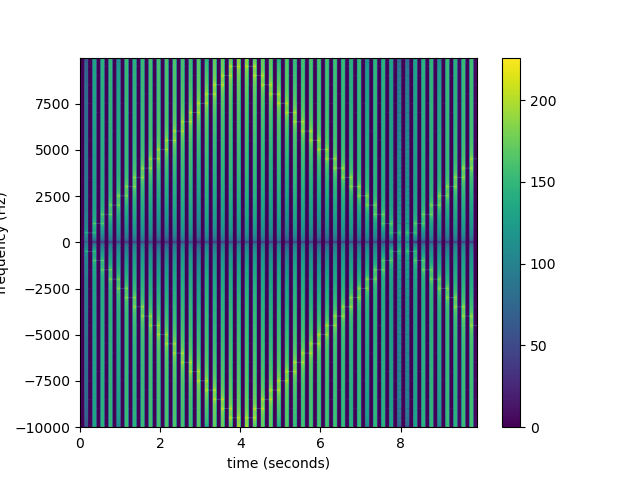

In [142]:
nfft = 2000
nshift = 200
R1 = short_term_fourier_transform(r1, nfft, nshift)
figure()
fft_bin = Fs/nfft
imshow(
    20*np.log10(abs(R1)+1).T, 
    aspect='auto',
    extent=[0, nshift*len(R1)/Fs, -Fs/2-fft_bin/2, Fs/2-fft_bin+fft_bin/2]
)
colorbar()
xlabel('time (seconds)')
ylabel('frequency (Hz)')

In [144]:
sd.play(r1, samplerate=Fs)